In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

DYSKRETYZACJA

zadanie 1 i 2

In [44]:
def dyskretyzacja(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2 * np.pi * f * t)

    return t, s

zadanie 3

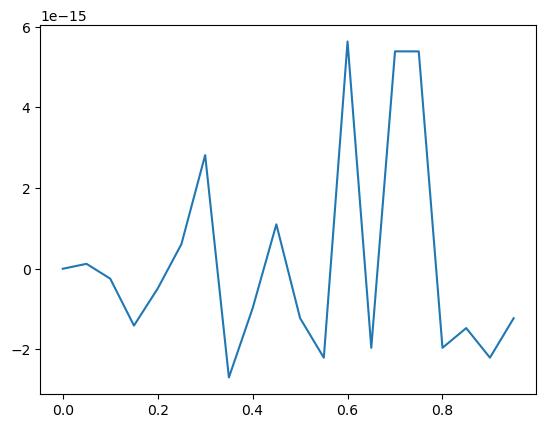

In [45]:
x, y = dyskretyzacja(10, 20)
plt.plot(x, y);

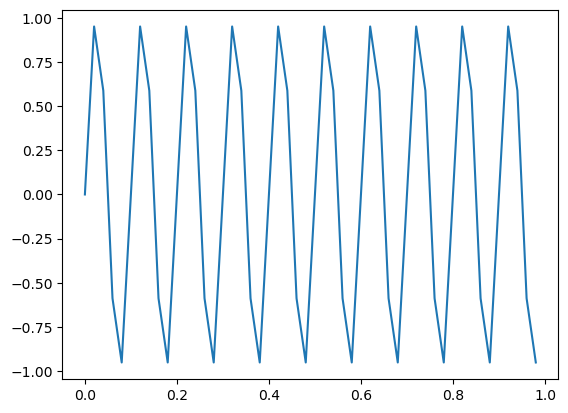

In [46]:
x, y = dyskretyzacja(10, 50)
plt.plot(x, y);

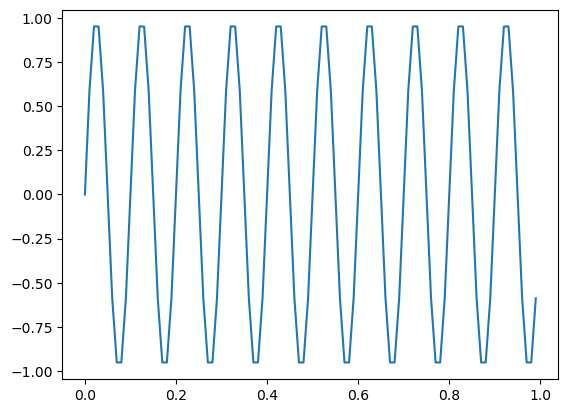

In [47]:
x, y = dyskretyzacja(10, 100)
plt.plot(x, y);

zadanie 4

twierdzenie Nyquista–Shannona

zadanie 5

zjawisko aliasingu

zadanie 6

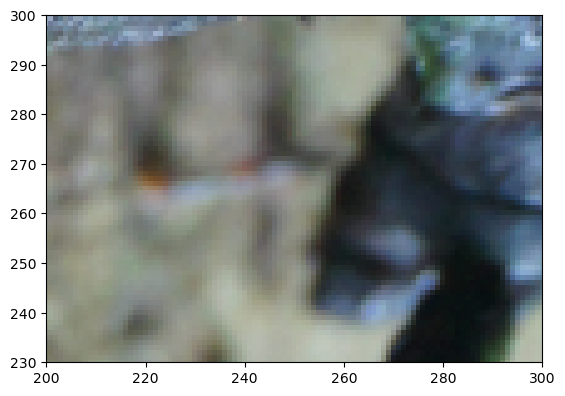

In [48]:
image = plt.imread('./robal.png')
plt.xlim(200, 300)
plt.ylim(230, 300)
plt.imshow(image);

KWANTYZACJA

zadanie 2

In [49]:
print(f"Liczba wymiarów wczytanej macierzy: {image.ndim}")

Liczba wymiarów wczytanej macierzy: 3


zadanie 3

In [50]:
print(f"Najgłębszy wymiar składa się z {len(image[0][0])} wartości")

Najgłębszy wymiar składa się z 3 wartości


zadanie 4

In [51]:
R = image[ :, :, 0]
G = image[ :, :, 1]
B = image[ :, :, 2]

wyznaczenie jasności piksela

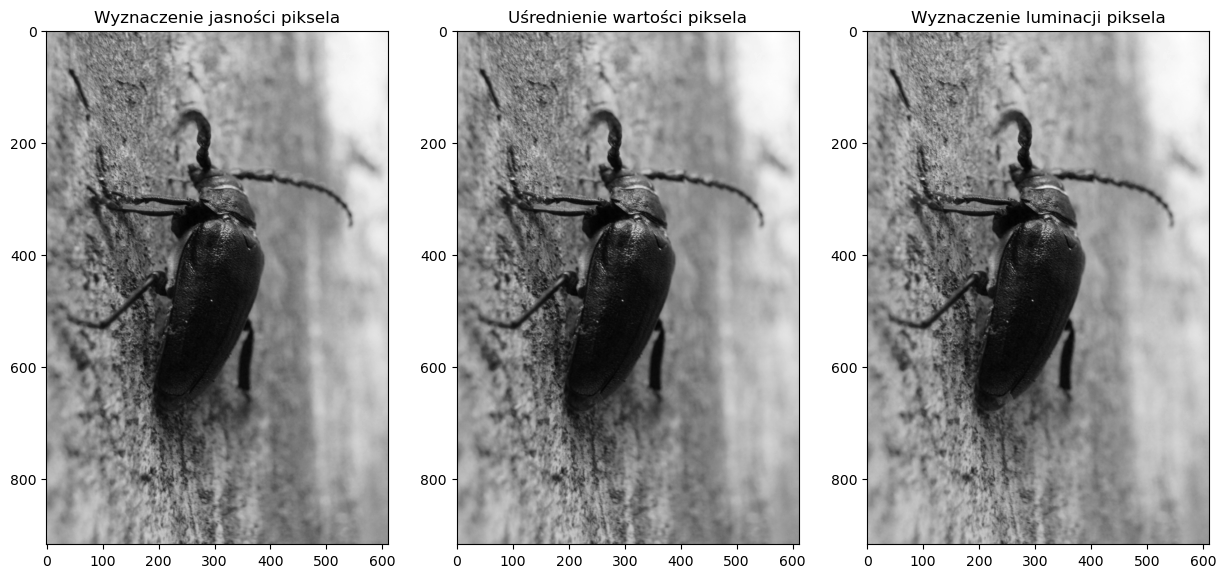

In [52]:
szarosc1 = (np.maximum(R, B, G) + np.minimum(R, B, G)) / 2
szarosc2 = (R + G + B) / 3
szarosc3 = (R + R + R) 

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].set_title("Wyznaczenie jasności piksela")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

axs[0].imshow(szarosc1, cmap=plt.get_cmap('gray'))
axs[1].imshow(szarosc2, cmap=plt.get_cmap('gray'))
axs[2].imshow(szarosc3, cmap=plt.get_cmap('gray'));

# axs[0].imshow(szarosc1)
# axs[1].imshow(szarosc2)
# axs[2].imshow(szarosc3)


zadanie 5

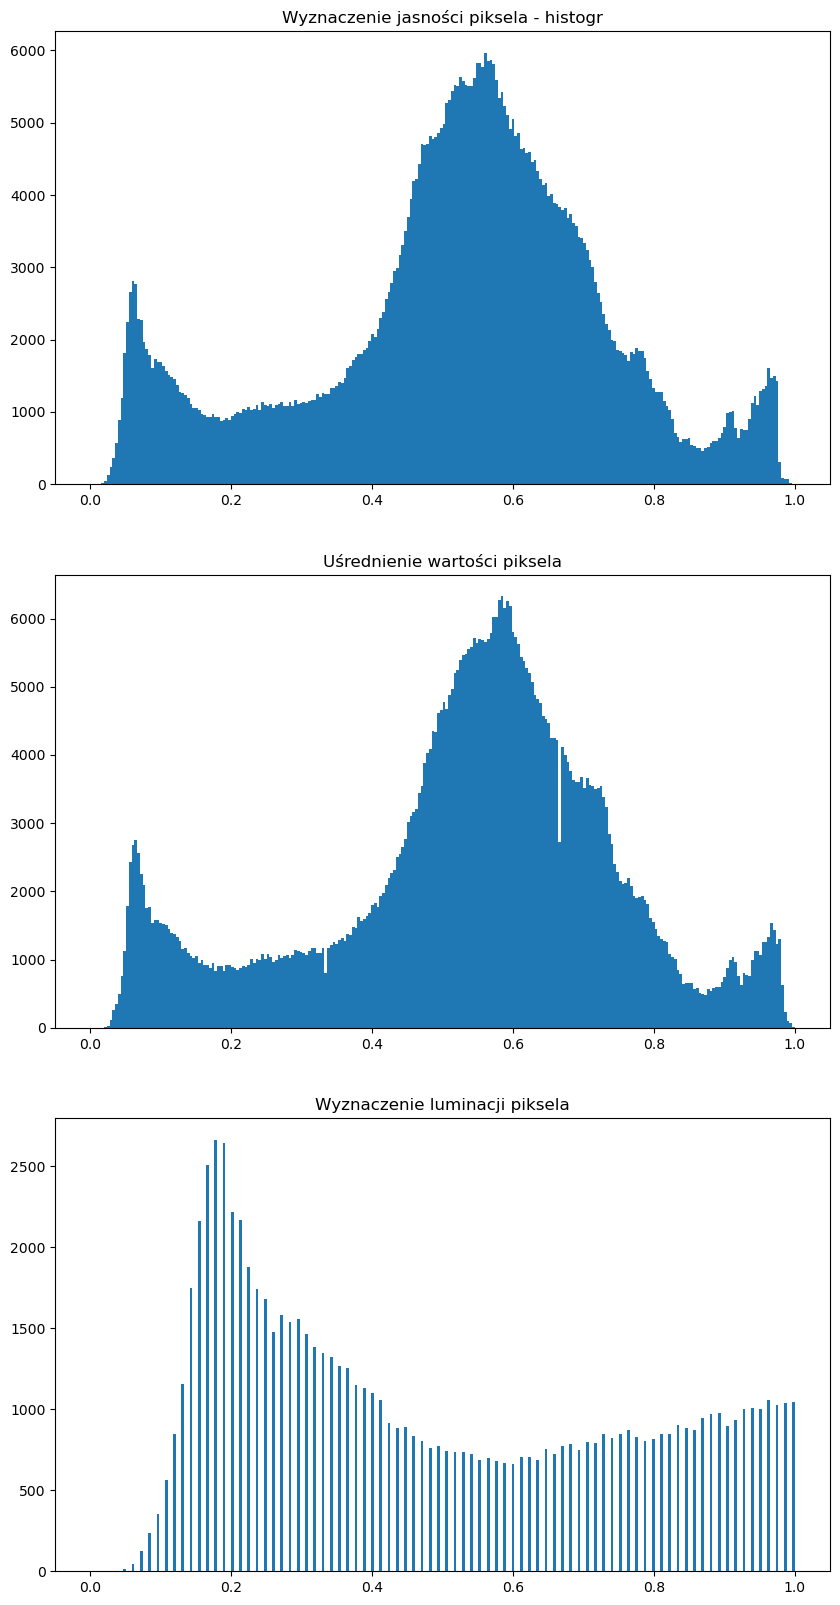

In [53]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

axs[0].set_title("Wyznaczenie jasności piksela - histogr")
axs[1].set_title("Uśrednienie wartości piksela")
axs[2].set_title("Wyznaczenie luminacji piksela")

min = szarosc1.min()
max = szarosc1.max()

axs[0].hist(szarosc1.ravel(), bins=256, range=(0, 1))
axs[1].hist(szarosc2.ravel(), bins=256, range=(0, 1))
axs[2].hist(szarosc3.ravel(), bins=256, range=(0, 1));
# Dowiedzieć się ile koszyków powinno być

zadanie 6

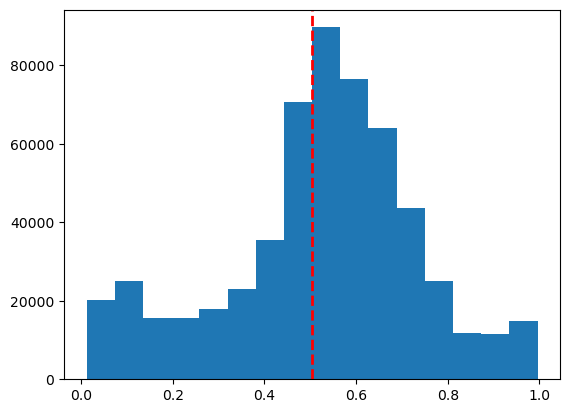

In [54]:
x = plt.hist(szarosc1.ravel(), bins=16)
plt.axvline(x[1].mean(), color='red', linestyle='dashed', linewidth=2);

zadanie 6 - numpy hist (w koncowej wersji usunac to albo to powyżej)

zadanie 7

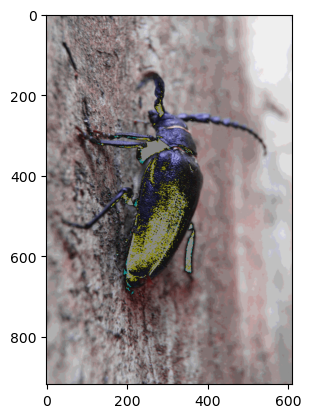

In [55]:
hist, bins = np.histogram(image.ravel(), bins=16)

rows, cols, x = image.shape
image_rc = image.copy()
# print(rows, cols)
mid = (bins[1:] + bins[:-1]) / 2
# print(mid)
# for i in range(image.shape[0]):
#     for j in range(image.shape[1]):
#         idx = np.argmin(np.abs(image_rc[i, j] - mid))
#         image_rc[i, j] = mid[idx]
        
dgt = np.digitize(image_rc, bins=bins[1:-1:1])
# print(gfg)
# image_rc = mid[gfg -2]
image_rc = (bins[dgt - 1] + bins[dgt + 1]) / 2

# for i in range(rows):
#     for j in range(cols):




plt.imshow(image_rc);

BINARYZACJA

zadanie 3, 4

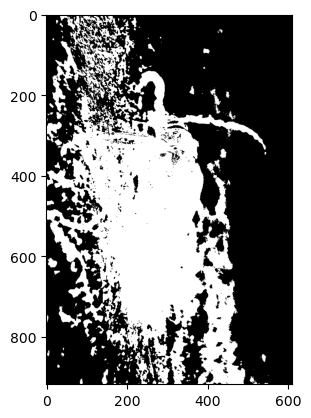

In [56]:
image_b = szarosc1.copy()

histogram = plt.hist(image_b.ravel(), bins=256, range=(0, 1))
histogram = histogram[1].reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(histogram)
threshold = (kmeans.cluster_centers_[0, 0] + kmeans.cluster_centers_[1, 0]) / 2

# print(threshold)

# rows, columns = image_b.shape
# for row in range(rows):
#     for col in range(columns):
#         if image_b[row, col] > threshold:
#             image_b[row, col] = 0
#         else:
#             image_b[row, col] = 1

image_b = np.where(image_b > threshold, 0, 1)

plt.imshow(image_b)
plt.set_cmap('gray');
